# extração do texto do PDF

## inglês

In [1]:
import PyPDF2
import nltk

from nltk.corpus import stopwords

In [46]:
#Listagem de palavras frequentes que não alteram o significado do texto (em ingles)
nltk.download('stopwords')
irrelevantes = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alvaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
#tratamento de flexão de palavras por lematização
tk = nltk.tokenize.WhitespaceTokenizer()
nltk.download('wordnet')
nltk.download('omw-1.4')
lmt = nltk.stem.WordNetLemmatizer()

#A biblioteca nltk não tem dados para lematização em PT
def lematize_text(text):
    lem_words = list()
    for word in tk.tokenize(text):
        lem_words.append(lmt.lemmatize(word))
    return lem_words


[nltk_data] Downloading package wordnet to /Users/alvaro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/alvaro/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [48]:
reader = PyPDF2.PdfReader('ArquivosEN/1608.06902.pdf')

In [49]:
len(reader.pages)

11

In [50]:
textin = reader.pages[0].extract_text()

In [51]:
lematizedTXT = lematize_text(textin)
print(len(lematizedTXT))

541


In [53]:
#Removendo elementos ruins - função bem custosa, deve ter alguma que faz isso mais facil
for word in lematizedTXT:
    for stopword in irrelevantes:
        if word == stopword:
            lematizedTXT.remove(word)


In [54]:
#Deu certo, mas ainda tem palavras que precisariam ser tratadas
print(len(lematizedTXT))
print(lematizedTXT)

380
['Recurrent', 'Neural', 'Networks', 'With', 'Limited', 'Numerical', 'Precision', 'Joachim', 'Ott\x03,', 'Zhouhan', 'Linz,Ying', 'Zhangz,', 'Shih-Chii', 'Liu\x03,', 'Yoshua', 'Bengiozy', '\x03Institute', 'Neuroinformatics,', 'University', 'Zurich', 'ETH', 'Zurich', 'ottj@ethz.ch,', 'shih@ini.ethz.ch', 'zDépartement', 'd’informatique', 'et', 'de', 'recherche', 'opérationnelle,', 'Université', 'de', 'Montréal', 'yCIFAR', 'Senior', 'Fellow', '{zhouhan.lin,', 'ying.zhang}@umontreal.ca', 'Abstract', 'Recurrent', 'Neural', 'Networks', '(RNNs)', 'produce', 'state-of-art', 'performance', 'many', 'machine', 'learning', 'task', 'demand', 'resource', 'term', 'memory', 'computational', 'power', 'often', 'high.', 'Therefore,', 'great', 'interest', 'optimizing', 'computation', 'performed', 'model', 'especially', 'considering', 'development', 'specialized', 'low-power', 'hardware', 'deep', 'networks.', 'One', 'way', 'reducing', 'computational', 'need', 'limit', 'numerical', 'precision', 'network',

In [ ]:
#Existem caracteres estranhos (Ott\x03,)
#Verificar pontuação, ela pode não ser tão importante
#Existem alguns trechos em espanhol(?)
#Palavras compostas como low-precision
#1arXiv:1608.06902v2 (?)

## Português

In [1]:
import PyPDF2

import nltk
from nltk.corpus import wordnet, stopwords
from nltk.stem import RSLPStemmer

import string

import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud

In [2]:
# importa dados que vamos usar 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('floresta')   # conjunto de textos em português anotados com etiquetas morfossintáticas
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /Users/alvaro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alvaro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package floresta to /Users/alvaro/nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alvaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /Users/alvaro/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

### remover pontuação

In [71]:
def removerPontuacao(texto :str) -> str:
    return "".join(caractere for caractere in texto if caractere not in string.punctuation)

### Lamatizar artigo

In [72]:
def lamatizarPalavra(palavra :str) -> str:
    stemmer = RSLPStemmer()     # Removedor de Sufixos da Língua Portuguesa
    lemma = stemmer.stem(palavra)
    if lemma == palavra:
        synsets = wordnet.synsets(palavra, lang='por')
        if synsets:
            lemma = synsets[0].lemmas()[0].name()
    return lemma

In [73]:
def lamatizarTexto(texto :str) -> str:
    palavras = texto.split()
    stopwordsPT = stopwords.words('portuguese')
    textoLematizado = [lamatizarPalavra(palavra.lower()) for palavra in palavras if palavra.lower() not in stopwordsPT]
    textoLematizado = ' '.join(textoLematizado)
    return textoLematizado

In [74]:
def preProcessamento(arquivo :str) -> str:
    artigo = PyPDF2.PdfReader(arquivo)
    textoPreProcessado = ''
    for pagina in artigo.pages:
        textoPreProcessado += pagina.extract_text()

    textoPreProcessado = lamatizarTexto(textoPreProcessado)
    return removerPontuacao(textoPreProcessado)

In [75]:
artigoPreProcessado = preProcessamento('ArquivosPT/DAR20052019.pdf')

### contagem dos termos do artigo

In [28]:
def contagemTermos(texto :str) -> dict:
    palavras = texto.split()
    return Counter(palavras)

In [49]:
def nuvemPalavras(texto :str, quantidadePalavras: int) -> None:
    contagemPalavras = contagemTermos(texto)

    palavras = dict(contagemPalavras.most_common(quantidadePalavras))

    nuvem_palavras = WordCloud()
    nuvem_palavras.generate_from_frequencies(palavras)

    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [32]:
contagemPalavras = contagemTermos(artigoPreProcessado)
contagemPalavras.most_common(10)

[('red', 51),
 ('imag', 43),
 ('plac', 42),
 ('neur', 35),
 ('process', 34),
 ('figur', 34),
 ('funç', 32),
 ('cam', 32),
 ('exempl', 30),
 ('dad', 29)]

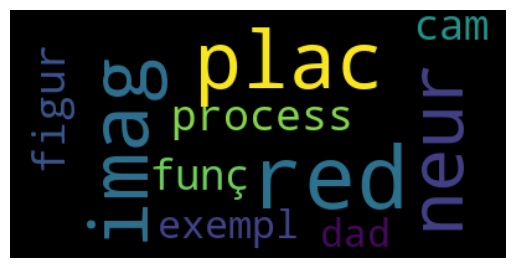

In [50]:
nuvemPalavras(artigoPreProcessado, 10)

### Identificar referências

In [77]:
# TODO esse código precisa ser melhorado
artigo = PyPDF2.PdfReader('ArquivosPT/DAR20052019.pdf')

In [78]:
len(artigo.pages)

37

In [79]:
# TODO melhorar isso aqui
pagina = artigo.pages[35].extract_text() + artigo.pages[36].extract_text()

In [81]:
def extrairReferencias(pagina :str) -> list:
    referencias = pagina.split(' REFERÊNCIAS  \n')[1]
    referencias = referencias.split('.  \n')

    referencias = [referencia.replace('\n', '') for referencia in referencias]
    return referencias

In [82]:
extrairReferencias(pagina)

['ARAÚJO , Flávio H. D. ; CARNEIRO , Allan C. ; SILVA , Romuere R. V. ; MEDEIROS , Fátima N. S. ; USHIZIMA , Daniela M.  Redes Neurais Convolucionais com Tensorﬂow: Teoria e Prática . III Escola Regional de Informática do Piauí. Livro Anais - Artigos e Minicursos, v. 1, n. 1,  p. 382 -406, jun, 2017.  Disponível em:  http://www.eripi.com.br/2017/images/anais/minicursos/7.pdf . Acesso em: 1 5 out. 2018',
 'BARCA , Maria Carolina Stockler ; SILVEIRA , Tiago Redondo de Siqueira ; MAGINI , Marcio . TREINAMENTO DE REDES NEURAIS ARTIFICIAIS: O ALGORITMO  BACKPROPAGATION . In: IX Encontro Latino Americano de Iniciação Científica e V Encontro Latino Americano de Pós -graduação, Universidade do Vale do Paraíba. Vale do Paraíba: Univap; 200 5. p. 46-49. Disponível em:  http://www.inicepg.u nivap.br/cd/INIC_2005/inic/IC1%20anais/IC1 -17.pdf . Acesso em: 12 out. 2018',
 'DPL, Deep Learning Book. Capítulo 23 – Como Funciona o Dropout? . Disponível em:  http://deeplearningbook.com.br/capitulo -23-co

### Identificar objetivo